<a href="https://colab.research.google.com/github/gachet/mis-colabs/blob/master/ejer_deriv(2)_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicios derivación numérica 

In [0]:
import numpy as np

### 1.- Escribir en python una función  de nombre "derivada" que acepte como entrada los siguientes parámetros:<br>

- f : función
        función vectorizada de una variable
- a : número
            Sirve para calcular la derivada en x = a
- metodo : string
        Nombre de la fórmula de diferenciación: 'adelante', 'atras' o 'central'
- h : número
        Tamaño del paso para la fórmuula de diferenciación
      


In [0]:
f = lambda x: np.cos(x)
    

In [0]:
def funcion(f, a,  h = 0.01,met = "central"):
    """Parámetros:
        - f: es la función
        - a: es el punto en el que se hará la derivada
        - met: es el método, deberá ser string: (central, detras, delante)
        - h: es la diferencia entre los puntos
    return:
        - float que es la derivada en el punto que se pone en el parámetro"""
    if met == "central":
        deriv = (f(a+h)-f(a-h))/(2*h)
    elif met == 'delante':
        deriv = (f(a+h)-f(a))/h
    elif met == 'detras':
        deriv = (f(a)-f(a-h))/h
    else:
        return('Eso no es ningún método')
    return deriv
    
    

In [0]:
def funcion2(f, a,  h = 0.01,met = "central"):
    """Parámetros:
        - f: es la función
        - a: es el punto en el que se hará la derivada
        - met: es el método, deberá ser string: (central, detras, delante)
        - h: es la diferencia entre los puntos
    return:
        - float que es la derivada en el punto que se pone en el parámetro"""
    if met == "central":
        deriv = (f(a+h)-2*f(a)+f(a-h))/(h**2)
    elif met == 'delante':
        deriv = (f(a+2*h)-2*f(a+h)+f(a))/(h**2)
    elif met == 'detras':
        deriv = (f(a)-2*f(a-h)+f(a-2*h))/(h**2)
    else:
        return('Eso no es ningún método')
    return deriv

In [0]:
funcion(f, np.pi/2)

-0.9999833334166673

### Retorna
   
- float, que es el valor de la derivada de f en el punto a de acuerdo al método escogido
- los valores por defecto de 'método´y 'h' son "central" y 0.01

### 2.- Utilizar la función anterior para dibujar la función 
$$y=\left(\frac{4x^2+2x+1}{x+2e^x}\right)^x$$
### Y su derivada en un rago [0,6] con 100 puntos

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
f = lambda x: ((4*x**2 + 2*x +1)/(x+2*np.exp(x)))**x

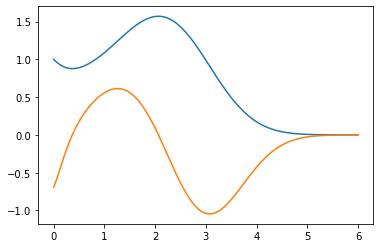

In [0]:
x = np.linspace(0,6,100)
f1 = ((4*x**2 + 2*x +1)/(x+2*np.exp(x)))**x
p1 = plt.plot(x,f1)

f2 = funcion(f,x)
p2 = plt.plot(x, f2)



### 3.- Utilice las fórmulas de diferencias hacia adelante y de diferencias hacia atrás para determinar todas las entradas faltantes en la siguiente tabla.
$$
\begin{matrix}
x & f(x) &f'(x) \\ \hline
0.5 & 0.4794 & \\ 
0.6 & 0.5646 & \\ 
0.7 & 0.6442 & 
\end{matrix}
$$

In [0]:
def deriv2(x, fx):
    df = np.zeros(len(x))
    h = x[1] - x[0]
    #Cálculo para los puntos intermedios
    df[1:-1] = (fx[2:] - fx[:-2])/(2*h)
    #Cálculo para el inicial
    df[0] = (fx[1] - fx[0])/h
    #Cálculo para el final
    df[-1] = (fx[-1] - fx[-2])/h
    return df

In [0]:
x = np.array([0.5, 0.6, 0.7])
y = np.array([0.4794, 0.5646, 0.6442])

In [0]:
deriv2(x,y)

array([0.852, 0.824, 0.796])

### 4.- Utilizar la función "derivada" para obtener el valor de la derivada de la función sin(x) en los puntos de la tabla anterior. Comparar los resultados
$$
\begin{matrix}
x & f(x) &f'(x) \\ \hline
0.5 & 0.4794 & \\ 
0.6 & 0.5646 & \\ 
0.7 & 0.6442 & 
\end{matrix}
$$

In [0]:
f = lambda x: np.sin(x)

In [0]:
funcion(f, 0.5,0.1, 'delante')

0.8521693479083237

In [0]:
funcion(f, 0.6)

0.8253218593848755

In [0]:
funcion(f, 0.7,0.1, 'detras')

0.7957521384265565

### 5.-  Encontrar la derivada de la función $f(x) = e^x — 2x^2 + 3x — 1$ en los puntos 0,0.2,0.4

In [0]:
f = lambda x: np.exp(x) - 2*x**2 + 3*x - 1

In [0]:
funcion(f, 0, 0.1, 'delante')

3.8517091807564774

In [0]:
funcion(f, 0.2)

3.4214231149745866

In [0]:
funcion(f, 0.4,0.1, 'detras')

3.0196589006526686

### 6.- En un circuito con tensión (voltaje) $V(t)$ e inductancia $L$, la primera ley de Kirchhoff provee la relación
$$
 V(t) = L \frac {di}{dt}+ Ri
 $$
### Siendo $R$ la resistencia del circuito e $i$ es la corriente. Suponer que medimos la corriente para varios valores de $t$ y obtenemos:
$$
\begin{matrix}
t & 1.0 &1.01 & 1.02 & 1.03 &1.04 \\ \hline
i & 3.10 &3.12& 3.14& 3.18&3.24 \\ 
\end{matrix}
$$
### donde $t$ se mide en segundos, $i$ está en amperes, la inductancia L es una constante de 0.98 henrios, la resistencia es 0.142 ohms. Aproxime el valor $V(t)$ cuando t = 1.00,1.01,1.02,1.03, y 1.04.

In [0]:
x = np.array([1.0, 1.01, 1.02, 1.03, 1.04])
fx = np.array([3.10, 3.12, 3.14, 3.18, 3.24])
c = deriv2(x, fx)
print(c)

[2. 2. 3. 5. 6.]


In [0]:
L = 0.98 
R = 0.142
V1 = L*c[0] + R
V2 = L*c[1] + R
V3 = L*c[2] + R
V4 = L*c[3] + R
V5 = L*c[4] + R
print(V1,V2,V3,V4,V5)

2.102 2.102 3.082 5.042000000000001 6.022


### 7.--  Calcule las aproximaciones por diferencia central de primer orden de 0(h4) para cada una de las funciones siguientes en la ubicación y con el tamaño de paso que se especifica: Utilice la función desarrollada en python:

$ y = x^3+4x-15 \hspace{1cm} en \,\,\, x=0 \hspace{1cm}h=0.25 $<br>
$y = x^2+cos(x) \hspace{1,25cm} en \,\,\, x=0.4 \hspace{0.75cm}h=0.1 $<br>
$y = tan(x/3) \hspace{1,75cm} en \,\,\, x=3 \hspace{1cm}h=0.5$<br>
$y = sin(0.5x^0.5) \hspace{1cm}en \,\,\, x=1 \hspace{1cm}h=0.2$<br>
$y = e^x +x \hspace{2cm}en \,\,\, x=2 \hspace{1cm}h=0.2$



In [0]:
f = lambda x: x**3 + 4*x -15
funcion(f, 0, 0.25)

4.0625

In [0]:
f = lambda x: x**2 + np.cos(x)
funcion(f, 0.4, 0.1 )

0.4112303638238335

In [0]:
f = lambda x: np.tan(x/3)
funcion(f, 3, 0.5 )

1.2374751947913774

In [0]:
f = lambda x: np.sin(0.5*x**0.5)
funcion(f, 1, 0.2 )

0.22072365139712627

In [0]:
f = lambda x: np.exp(x) + x
funcion(f, 2, 0.2 )

8.438415087552942

### 8.- Para un cohete, se recabaron los datos siguientes de la distancia recorrida versus el tiempo:

$$
\begin{matrix}
t (seg) & 0 & 25 & 50 & 75 & 100 & 125 \\ \hline
y (km) & 0 &32& 58& 78&92 &100  
\end{matrix}
$$
### Use la diferenciación numérica para estimar la velocidad y aceleración del cohete en cada momento

### Velocidad

In [0]:
x = np.array([0, 25, 50, 75, 100, 125])
y = np.array([0, 32, 58, 78, 92, 100])
v = deriv2(x, y)
print(v)


[1.28 1.16 0.92 0.68 0.44 0.32]


### Aceleración

In [0]:
h = 25
#delante
d2_1 = (y[2] - 2*y[1] + y[0])/(h**2)
#detras
d2_6 = (y[5] - 2*y[4] + y[3])/(h**2)
#intermedias
d2_2 = (y[2] - 2*y[1] + y[0])/(h**2)
d2_3 = (y[3] - 2*y[2] + y[1])/(h**2)
d2_4 = (y[4] - 2*y[3] + y[2])/(h**2)
d2_5 = (y[5] - 2*y[4] + y[3])/(h**2)

a = np.array([d2_1, d2_2, d2_3, d2_4, d2_5, d2_6])
print(a)

[-0.0096 -0.0096 -0.0096 -0.0096 -0.0096 -0.0096]


### 9.- 
![imagen.png](attachment:imagen.png)
### La manivela AB de longitud R=90 m rota con un velocidad angular constante de $\frac{d\theta}{dt}= 5000$  rev/min. La posición del pistón C varía con el ángulo $\theta$ de acuerdo con:

$$ x = R \left ( cos\theta + \sqrt{2.5^2 - sin^2(\theta)}\right )$$

### Escribir el código necesario para dibujar la aceleración del pistón para $\theta = 0º,5º,10º,....,180º$. Utlizar diferenciación numérica para calcular la aceleración.

In [0]:
x = np.linspace(0,180,37)
R = 90
f = lambda x: R*(np.cos(x)+(2.5**2- (np.sin(x))**2)**(1/2))

In [0]:
def funcion2(f, a,  h = 0.01,met = "central"):
    """Parámetros:
        - f: es la función
        - a: es el punto en el que se hará la derivada
        - met: es el método, deberá ser string: (central, detras, delante)
        - h: es la diferencia entre los puntos
    return:
        - float que es la segunda derivada en el punto que se pone en el parámetro"""
    if met == "central":
        deriv2 = (f(a+h)-2*f(a)+f(a-h))/(h**2)
    elif met == 'delante':
        deriv2 = (f(a+2*h)-2*f(a+h)+f(a))/(h**2)
    elif met == 'detras':
        deriv2 = (f(a)-2*f(a-h)+f(a-2*h))/(h**2)
    else:
        return('Eso no es ningún método')
    return deriv2


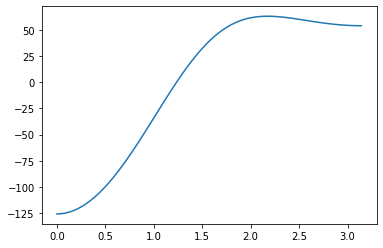

In [0]:
x = np.linspace(0,np.pi,100)
f = funcion2(f, x, (5*np.pi)/180)
plt.plot(x,f)

### 10.-


### Las estaciones de radar A y B, separadas una distancia de a=500m , siguen el avión C y almacenan los ángulos $\alpha \,\, y\,\, \beta$ a intervalos de 3 seg. Si tenemos 

$$
\begin{matrix}
t (seg) & 9 & 10 & 11 \\ \hline
\alpha & 54.80º &54,06º& 53.34º \\ \hline
\beta & 65.59º &64,59º& 63.62º 
\end{matrix}
$$
![imagen.png](attachment:imagen.png)
### Calcular la velocidad $v$ del  avión y el ángulo de ascenso $\gamma$ a t=10 seg. Las coordenadas del avión se calculan como:

$$
x = a \frac {\tan\beta}{\tan\beta-\tan\alpha} \hspace{3cm} y = a \frac {\tan\alpha\tan\beta}{\tan\beta-\tan\alpha} 
$$


In [0]:
import numpy as np

In [0]:
def gradarad(a):
    return (a*np.pi)/180
    

In [0]:
t = np.array([9,10,11])
av = np.array([54.80,53.34])
bv = np.array([65.59,63.62])
a = gradarad(av)
b = gradarad(bv)

In [0]:
def x(a,b):
    c = 500
    return c*(np.tan(b)/(np.tan(b)-np.tan(a)))


    

In [0]:
def y(a,b):
    c = 500
    return c*((np.tan(a)*np.tan(b))/(np.tan(b) - np.tan(a)) )

In [0]:
vx = ((x(a[1],b[1])-x(a[0],b[0])))/2
vy = ((y(a[1],b[1])-y(a[0],b[0])))/2
vf = (vx**2 + vy**2)**(1/2)
print('v en x: ',vx)
print('v en y: ',vy)
print('La velocidad total es: ', vf)

v en x:  48.36097598564345
v en y:  13.083197366050854
La velocidad total es:  50.09944162965314


## Ángulo

In [0]:
angulor = np.arctan(vy/vx)
angulog = (angulor * 180)/np.pi
print('El ángulo para t = 10s en grados es: ',angulog, 'y en radianes: ',angulor)

El ángulo para t = 10s en grados es:  15.137987979364379 y en radianes:  0.26420773236723183
